In [1]:
1

1

In [2]:
!python --version

Python 3.6.13 :: Anaconda, Inc.


In [3]:
!pip install "tensorflow>=1.15.2,<2.0" ampligraph

In [486]:
import numpy as np
import pandas as pd
import ampligraph

ampligraph.__version__

'1.4.0'

In [487]:
import tensorflow as tf

In [488]:
data_set = 'heroes_data.csv'
df = pd.read_csv(data_set)

In [489]:
df.isna().sum()

Unnamed: 0           0
id                   0
name                 0
localized_name       0
primary_attr         0
attack_type          0
roles                0
img                  0
icon                 0
base_health          0
base_health_regen    0
base_mana            0
base_mana_regen      0
base_armor           0
base_mr              0
base_attack_min      0
base_attack_max      0
base_str             0
base_agi             0
base_int             0
str_gain             0
agi_gain             0
int_gain             0
attack_range         0
projectile_speed     0
attack_rate          0
move_speed           0
turn_rate            0
cm_enabled           0
legs                 0
hero_id              0
turbo_picks          0
turbo_wins           0
pro_ban              0
pro_win              0
pro_pick             0
1_pick               0
1_win                0
2_pick               0
2_win                0
3_pick               0
3_win                0
4_pick               0
4_win      

In [490]:
# Тестовый набор это герои у кого 2 и менее ноги, учебный набор - это герои с большим количеством ног
df["train"] = df.legs < 3
df.train.value_counts()

True     109
False     11
Name: train, dtype: int64

In [491]:
# Entities naming
df["id"] = df.index.values.astype(str)
df["hero_id"] =  "Hero" + df.id
df["name_id"] =  "Name" + df.localized_name.str.title().str.replace(" ", "").str.replace("-", "")
df["attr_id"] =  "Attr" + df.primary_attr.str.title().str.capitalize()
df["attack_type_id"] = "AttackType" + df.attack_type.str.title()
df["main_role_id"] = "MainRole" + df.main_role.str.title().str.capitalize().str.replace("_", "")
list(df.columns)




['Unnamed: 0',
 'id',
 'name',
 'localized_name',
 'primary_attr',
 'attack_type',
 'roles',
 'img',
 'icon',
 'base_health',
 'base_health_regen',
 'base_mana',
 'base_mana_regen',
 'base_armor',
 'base_mr',
 'base_attack_min',
 'base_attack_max',
 'base_str',
 'base_agi',
 'base_int',
 'str_gain',
 'agi_gain',
 'int_gain',
 'attack_range',
 'projectile_speed',
 'attack_rate',
 'move_speed',
 'turn_rate',
 'cm_enabled',
 'legs',
 'hero_id',
 'turbo_picks',
 'turbo_wins',
 'pro_ban',
 'pro_win',
 'pro_pick',
 '1_pick',
 '1_win',
 '2_pick',
 '2_win',
 '3_pick',
 '3_win',
 '4_pick',
 '4_win',
 '5_pick',
 '5_win',
 '6_pick',
 '6_win',
 '7_pick',
 '7_win',
 '8_pick',
 '8_win',
 'winrate',
 'lane',
 'main_role',
 'train',
 'name_id',
 'attr_id',
 'attack_type_id',
 'main_role_id']

In [492]:
triples = []
for _, row in df[df["train"]].iterrows():
    # object properties
    hero_name = (row["hero_id"], "hasName", row["name_id"])
    hero_attr = (row["hero_id"], "hasAttribute", row["attr_id"])
    hero_attack_type = (row["hero_id"], "hasAttackType", row["attack_type_id"])
    main_role = (row["hero_id"], "hasMainRole", row["main_role_id"])
    # value properties
    base_health = (row["hero_id"], "baseHealth", int(row["base_health"]))
    base_health_regen = (row["hero_id"], "baseHealthRegen", float(row["base_health_regen"]))
    base_mana = (row["hero_id"], "baseMana", int(row["base_mana"]))
    base_mana_regen = (row["hero_id"], "baseManaRegen", float(row["base_mana_regen"]))
    base_armor = (row["hero_id"], "baseArmor", float(row["base_armor"]))
    base_attack_min = (row["hero_id"], "baseAttackMin", int(row["base_attack_min"]))
    base_attack_max = (row["hero_id"], "baseAttackMax", int(row["base_attack_max"]))
    base_str = (row["hero_id"], "baseStr", int(row["base_str"]))
    base_agi = (row["hero_id"], "baseAgi", int(row["base_agi"]))
    base_int = (row["hero_id"], "baseInt", int(row["base_int"]))
    str_gain = (row["hero_id"], "strGain", float(row["str_gain"]))
    agi_gain = (row["hero_id"], "agiGain", float(row["agi_gain"]))
    int_gain = (row["hero_id"], "intGain", float(row["int_gain"]))
    attack_range = (row["hero_id"], "attackRange", int(row["attack_range"]))
    projectile_speed = (row["hero_id"], "projectileSpeed", int(row["projectile_speed"]))
    attack_rate = (row["hero_id"], "attackRate", float(row["attack_rate"]))
    move_speed = (row["hero_id"], "moveSpeed", int(row["move_speed"]))
    turn_rate = (row["hero_id"], "turnRate", float(row["turn_rate"]))
    legs = (row["hero_id"], "legs", int(row["legs"]))
    picks = (row["hero_id"], "picks", int(row["turbo_picks"]))  
    wins = (row["hero_id"], "wins", int(row["turbo_wins"]))
    winrate = (row["hero_id"], "winrate", float(row["winrate"]))
    
    triples.extend((hero_name, hero_attr, hero_attack_type, main_role, base_health, base_health_regen, base_mana, base_mana_regen,
                   base_armor, base_attack_min, base_attack_max, base_str, base_agi, base_int, str_gain,
                   agi_gain, int_gain, attack_range, projectile_speed, attack_rate, move_speed,
                   turn_rate, legs, picks, wins, winrate))
                           
                       
                       
    
    
    
    
    

In [493]:
triples_df = pd.DataFrame(triples, columns=["subject", "predicate", "object"])
len(triples_df)

2834

In [494]:
from ampligraph.evaluation import train_test_split_no_unseen 

X_train, X_valid = train_test_split_no_unseen(np.array(triples), test_size=1000)

In [495]:
print('Train set size: ', X_train.shape)
print('Test set size: ', X_valid.shape)

Train set size:  (1834, 3)
Test set size:  (1000, 3)


In [496]:
from ampligraph.latent_features import ComplEx

model = ComplEx(batches_count=50,
                epochs=300,
                k=100,
                eta=20,
                optimizer='adam', 
                optimizer_params={'lr':1e-4},
                loss='multiclass_nll',
                regularizer='LP', 
                regularizer_params={'p':3, 'lambda':1e-5}, 
                seed=0, 
                verbose=True)

In [497]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

model.fit(X_train)

Average ComplEx Loss:   0.225842: 100%|██████████| 300/300 [00:46<00:00,  6.40epoch/s]


In [498]:
filter_triples = np.concatenate((X_train, X_valid))

In [499]:
from ampligraph.evaluation import evaluate_performance

ranks = evaluate_performance(X_valid,
                             model=model, 
                             filter_triples=filter_triples,
                             use_default_protocol=True,
                             verbose=True)

WARNING - DeprecationWarning: use_default_protocol will be removed in future. Please use corrupt_side argument instead.


100%|██████████| 1000/1000 [00:01<00:00, 553.86it/s]


Мы собираемся использовать функции mrr_score (средний обратный рейтинг) и hits_at_n_score.
mrr_score: функция вычисляет среднее значение обратной величины элементов вектора ранжирования.
hits_at_n_score: функция вычисляет, сколько элементов вектора ранжирования занимают первые n позиций.

In [500]:
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score

mr = mr_score(ranks)
mrr = mrr_score(ranks)

print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))

hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % (hits_1))

MRR: 0.37
MR: 25.83
Hits@10: 0.57
Hits@3: 0.39
Hits@1: 0.28


In [40]:
!git clone https://github.com/wyldebeast-wunderliebe/incf.countryutils.git


Клонирование в «incf.countryutils»...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 132 (delta 20), reused 39 (delta 16), pack-reused 87
Получение объектов: 100% (132/132), 66.24 КиБ | 1.08 МиБ/с, готово.
Определение изменений: 100% (58/58), готово.
ERROR: You must give at least one requirement to install (see "pip help install")


In [43]:
!cd incf.countryutils && pip install .

Processing /Users/dmitriystupakov/PycharmProjects/pythonProject11/incf.countryutils
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for incf.countryutils: filename=incf.countryutils-1.2-py3-none-any.whl size=21662 sha256=144c07855f5da78f443938285488bd9d3f7b8af3a1d51efdf74f03c9085d30a4
  Stored in directory: /private/var/folders/l3/h4yqh7751wn_ztwyp5n3w77w0000gn/T/pip-ephem-wheel-cache-93iyccy4/wheels/40/31/4a/09e544221eacef6707c10f7cb0317a12b05eee4f280a73f556
Successfully built incf.countryutils


In [44]:
!pip install adjustText

     |████████████████████████████████| 8.5 MB 2.1 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 61 kB 2.7 MB/s eta 0:00:011
     |████████████████████████████████| 3.0 MB 5.9 MB/s eta 0:00:01
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=80b77d1ff8b07f194f9a6dd0a7607c9d480852f074a1c1c0d1e660fbe1fd4517
  Stored in directory: /Users/dmitriystupakov/Library/Caches/pip/wheels/70/86/f9/89161c891b07f90e2b15b5e4b6dfe70cc8f54c5ef26c0116f1
Successfully built adjustText


In [47]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [501]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from incf.countryutils import transformations
%matplotlib inline

In [507]:
id_to_name_map = {**dict(zip(df.hero_id, df.name_id))}

In [503]:
heroes = df.hero_id[df["train"]].unique()
hero_embeddings = dict(zip(heroes, model.get_embeddings(heroes)))

In [511]:
embeddings_2d = PCA(n_components=2).fit_transform(np.array([i for i in hero_embeddings.values()]))

In [514]:
from ampligraph.discovery import find_clusters
from sklearn.cluster import KMeans

clustering_algorithm = KMeans(n_clusters=6, n_init=50, max_iter=500, random_state=0)
clusters = find_clusters(heroes, model, clustering_algorithm, mode='entity')

In [515]:
def cn_to_ctn(role):
    try:
        return transformations.cn_to_ctn(id_to_name_map[role])
    except KeyError:
        return "unk"

In [516]:
plot_df = pd.DataFrame({"heroes": heroes, 
                        "embedding1": embeddings_2d[:, 0], 
                        "embedding2": embeddings_2d[:, 1],
                        "role": pd.Series(heroes).apply(cn_to_ctn),
                        "cluster": "cluster" + pd.Series(clusters).astype(str)})

In [517]:
top20heroes = ["Hero1", "Hero1", "Hero3", "Hero4", 
               "Hero5", "Hero6", "Hero7", "Hero8", 
               "Hero9", "Hero10", "Hero11", "Hero12", 
               "Hero13", "Hero14", "Hero15", "Hero16", 
               "Hero17", "Hero18", "Hero19", "Hero20"]

def plot_clusters(hue):
    np.random.seed(0)
    plt.figure(figsize=(12, 12))
    plt.title("{} embeddings".format(hue).capitalize())
    ax = sns.scatterplot(data=plot_df[plot_df.role!="unk"], x="embedding1", y="embedding2", hue=hue)
    texts = []
    for i, point in plot_df.iterrows():
        if point["heroes"] in top10heroes or np.random.random() < 0.1:
            texts.append(plt.text(point['embedding1']+0.01, point['embedding2']+0.02, str(point["heroes"])))
    adjust_text(texts)

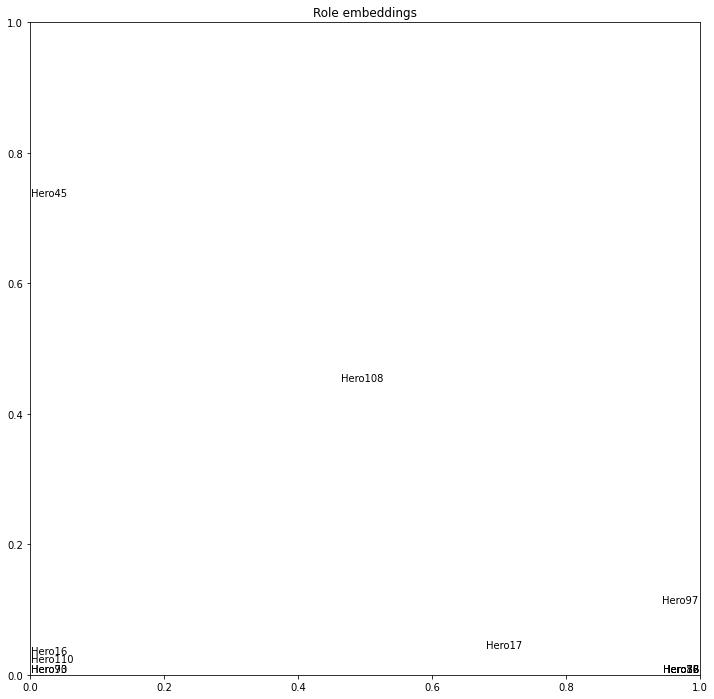

In [518]:
plot_clusters("role")

In [400]:
from sklearn import metrics
metrics.adjusted_rand_score(plot_df.role, plot_df.cluster)

0.0

2

# classification

In [401]:
df["results"] = df.winrate/100

In [402]:
df.results.value_counts(normalize=True)

0.471859    0.008333
0.517617    0.008333
0.513394    0.008333
0.466893    0.008333
0.467038    0.008333
              ...   
0.504269    0.008333
0.477253    0.008333
0.502432    0.008333
0.473509    0.008333
0.474201    0.008333
Name: results, Length: 120, dtype: float64

In [382]:
!pip install xgboost

In [403]:
new_df = df[["results", "train"]].copy()
new_df

,results,train
0,0.478671,True
1,0.487116,True
2,0.526917,False
3,0.494001,True
4,0.498610,True
...,...,...
115,0.465906,True
116,0.507814,True
117,0.506217,True
118,0.463165,True


In [404]:
new_df["base_health_regen"] = df["base_health_regen"]
new_df["base_mana_regen"] = df["base_mana_regen"]
new_df["base_armor"] = df["base_armor"]
new_df["base_attack_min"] = df["base_attack_min"]
new_df["base_attack_max"] = df["base_attack_max"]
new_df["base_str"] = df["base_str"]
new_df["base_agi"] = df["base_agi"]
new_df["base_int"] = df["base_int"]
new_df["str_gain"] = df["str_gain"]
new_df["agi_gain"] = df["agi_gain"]
new_df["int_gain"] = df["int_gain"]
new_df["attack_range"] = df["attack_range"]
new_df["projectile_speed"] = df["projectile_speed"]
new_df["attack_rate"] = df["attack_rate"]
new_df["move_speed"] = df["move_speed"]
new_df["legs"] = df["legs"]
new_df["turbo_picks"] = df["turbo_picks"]
new_df["turbo_wins"] = df["turbo_wins"]



In [405]:
encoded_cols = pd.get_dummies(df[["name_id", "attr_id", "attack_type_id", "main_role_id",]])

encoded_cols

,name_id_NameAbaddon,name_id_NameAlchemist,name_id_NameAncientApparition,name_id_NameAntiMage,name_id_NameArcWarden,name_id_NameAxe,name_id_NameBane,name_id_NameBatrider,name_id_NameBeastmaster,name_id_NameBloodseeker,...,attr_id_AttrAgi,attr_id_AttrInt,attr_id_AttrStr,attack_type_id_AttackTypeMelee,attack_type_id_AttackTypeRanged,main_role_id_MainRoleHardsupport,main_role_id_MainRoleMid,main_role_id_MainRoleOfflane,main_role_id_MainRoleSafelane,main_role_id_MainRoleSupport
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
116,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
117,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
118,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [406]:
new_df = new_df.join(encoded_cols)
new_df

,results,train,base_health_regen,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,...,attr_id_AttrAgi,attr_id_AttrInt,attr_id_AttrStr,attack_type_id_AttackTypeMelee,attack_type_id_AttackTypeRanged,main_role_id_MainRoleHardsupport,main_role_id_MainRoleMid,main_role_id_MainRoleOfflane,main_role_id_MainRoleSafelane,main_role_id_MainRoleSupport
0,0.478671,True,0.25,0.0,2.0,29,33,23,24,12,...,1,0,0,1,0,0,0,0,1,0
1,0.487116,True,2.75,0.0,2.0,27,31,25,20,18,...,0,0,1,1,0,0,0,1,0,0
2,0.526917,False,0.00,0.0,4.0,35,41,22,22,22,...,0,1,0,0,1,1,0,0,0,0
3,0.494001,True,0.00,0.0,5.0,35,41,24,22,17,...,1,0,0,1,0,0,0,0,1,0
4,0.498610,True,0.00,1.0,2.0,28,34,18,16,16,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.465906,True,0.00,0.0,3.0,21,25,21,18,25,...,0,1,0,0,1,1,0,0,0,0
116,0.507814,True,0.25,0.0,3.0,22,29,17,28,21,...,1,0,0,0,1,0,0,1,0,0
117,0.506217,True,0.00,0.6,2.0,32,36,22,19,24,...,0,1,0,1,0,0,1,0,0,0
118,0.463165,True,0.00,0.0,3.0,26,32,20,16,18,...,0,0,1,0,1,0,0,0,0,1


In [407]:
from xgboost import XGBClassifier

In [412]:
clf_model = XGBClassifier(n_estimators=500, max_depth=5, objective="multi:softmax", use_label_encoder=True)

In [413]:
X_train = new_df[df["train"]].drop(["results"], axis=1)
y_train = new_df[df["train"]].results
X_val = new_df[~df["train"]].drop(["results"], axis=1)
y_val = new_df[~df["train"]].results

In [414]:
clf_model.fit(X_train, y_train, verbose=1)

/Users/dmitriystupakov/.conda/envs/pythonProject11/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:57:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [415]:
from sklearn import metrics
metrics.accuracy_score(y_val, clf_model.predict(X_val))

ValueError: continuous is not supported

# GRAPH EMBENDING

In [483]:
def get_features_target(mask):
    
    def get_embeddings(hero):
        return team_embeddings.get(hero, np.full(200, np.nan))
    
    X = np.hstack((np.vstack(df[mask].hero_id.apply(get_embeddings).values),
                )
    y = df[mask].results.values
    return X, y

SyntaxError: invalid syntax (<ipython-input-483-ca3dcc070f05>, line 7)

In [485]:
clf_X_train, y_train = get_features_target((df["train"]))
clf_X_test, y_test = get_features_target((~df["train"]))

KeyError: 'train'

In [479]:
clf_X_train


array([[ 0.36460689, -0.27083418,  0.14476576, ...,         nan,
                nan,         nan],
       [ 0.14715391, -0.28927842, -0.38653088, ...,         nan,
                nan,         nan],
       [-0.36357623, -0.18903318, -0.05461784, ...,         nan,
                nan,         nan],
       ...,
       [ 0.13610551, -0.43715224, -0.11657327, ...,         nan,
                nan,         nan],
       [ 0.17172661, -0.27165863, -0.15668282, ...,         nan,
                nan,         nan],
       [ 0.47387296, -0.39172977, -0.38238174, ...,         nan,
                nan,         nan]])

In [478]:
clf_X_train.shape, clf_X_test.shape

((109, 400), (11, 400))

In [419]:
np.isnan(clf_X_test).sum()/clf_X_test.shape[1]

11.0

In [420]:
clf_model = XGBClassifier(n_estimators=500, max_depth=5, objective="multi:softmax")

In [421]:
clf_model.fit(clf_X_train, y_train)

/Users/dmitriystupakov/.conda/envs/pythonProject11/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:00:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [422]:
df[~df["train"]].results.value_counts(normalize=True)

0.526917    0.090909
0.505346    0.090909
0.496124    0.090909
0.506086    0.090909
0.531753    0.090909
0.444742    0.090909
0.568585    0.090909
0.511560    0.090909
0.474201    0.090909
0.488306    0.090909
0.498678    0.090909
Name: results, dtype: float64

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [423]:
metrics.accuracy_score(y_test, clf_model.predict(clf_X_test))

ValueError: continuous is not supported

# Linked Prediction


In [438]:
X_train, X_valid = train_test_split_no_unseen(np.array(triples), test_size=1000)

In [439]:
df = pd.DataFrame(X_train,columns = ['subject','predicate','object'])
heroSubject = "Hero7"
print(df[df.subject==heroSubject])

     subject        predicate              object
53     Hero7    baseAttackMin                  16
69     Hero7            picks               94697
83     Hero7      hasMainRole    MainRoleSafelane
121    Hero7          hasName      NameJuggernaut
177    Hero7    baseManaRegen                 0.0
447    Hero7             wins               50057
466    Hero7        moveSpeed                 305
484    Hero7  projectileSpeed                   0
698    Hero7          agiGain                 2.8
718    Hero7          intGain                 1.4
999    Hero7    baseAttackMax                  20
1227   Hero7          baseAgi                  34
1298   Hero7             legs                   2
1361   Hero7        baseArmor                 3.0
1474   Hero7          strGain                 2.2
1547   Hero7          baseStr                  20
1613   Hero7         turnRate                 0.6
1621   Hero7          winrate  51.307863031071655
1810   Hero7       baseHealth                 200


In [450]:
print(df[df.predicate=="hasMainRole"])

      subject    predicate               object
6      Hero38  hasMainRole      MainRoleSupport
66      Hero4  hasMainRole  MainRoleHardsupport
68     Hero63  hasMainRole          MainRoleMid
78     Hero14  hasMainRole      MainRoleOfflane
83      Hero7  hasMainRole     MainRoleSafelane
...       ...          ...                  ...
1563   Hero36  hasMainRole      MainRoleOfflane
1638   Hero29  hasMainRole  MainRoleHardsupport
1758  Hero117  hasMainRole          MainRoleMid
1785   Hero28  hasMainRole  MainRoleHardsupport
1821    Hero0  hasMainRole     MainRoleSafelane

[64 rows x 3 columns]


In [452]:
dfFiltered = np.array(df[(df.subject!=heroSubject) | ((df.subject==heroSubject) & ~df.predicate.isin(["hasMainRole"]))])

In [453]:
model.fit(dfFiltered)

Average ComplEx Loss:   0.243345: 100%|██████████| 300/300 [00:49<00:00,  6.05epoch/s]


In [454]:
statements = np.array([
    [f'{heroSubject}', 'hasMainRole', 'MainRoleSafelane'],
    [f'{heroSubject}', 'hasMainRole', 'MainRoleOfflane'],
    [f'{heroSubject}', 'hasMainRole', 'MainRoleMid'],
    [f'{heroSubject}', 'hasMainRole', 'MainRoleHardsupport'],
    [f'{heroSubject}', 'hasMainRole', 'MainRoleSupport'],
])

In [455]:
statements_filter = np.array(list({tuple(i) for i in np.vstack((dfFiltered, statements))}))
len(statements_filter)
statements_filter

array([['Hero41', 'hasName', 'NameDeathProphet'],
       ['Hero34', 'hasMainRole', 'MainRoleOfflane'],
       ['Hero26', 'hasAttackType', 'AttackTypeMelee'],
       ...,
       ['Hero24', 'baseArmor', '3.0'],
       ['Hero3', 'strGain', '2.7'],
       ['Hero97', 'hasAttackType', 'AttackTypeMelee']], dtype='<U21')

In [456]:
ranks_statements = evaluate_performance(
    statements, 
    model=model, 
    filter_triples=statements_filter, 
    corrupt_side = 's+o',
    use_default_protocol=False,
    verbose=True)

100%|██████████| 5/5 [00:00<00:00, 75.47it/s]


In [457]:
scores = model.predict(statements)
scores

array([4.283038 , 4.459559 , 4.4706717, 4.74881  , 3.7870803],
      dtype=float32)

In [458]:
from scipy.special import expit
probs = expit(scores)

pd.DataFrame(list(zip([' '.join(x) for x in statements], 
                      ranks_statements, 
                      np.squeeze(scores),
                      np.squeeze(probs))), 
             columns=['statement', 'rank', 'score', 'prob']).sort_values("prob")

,statement,rank,score,prob
4,Hero7 hasMainRole MainRoleSupport,70,3.787080,0.977840
0,Hero7 hasMainRole MainRoleSafelane,40,4.283038,0.986387
1,Hero7 hasMainRole MainRoleOfflane,63,4.459559,0.988565
2,Hero7 hasMainRole MainRoleMid,72,4.470672,0.988690
3,Hero7 hasMainRole MainRoleHardsupport,30,4.748810,0.991412
